In [134]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,GridSearchCV# type: ignore
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler# type: ignore
from sklearn.feature_selection import VarianceThreshold,SelectKBest,mutual_info_classif,mutual_info_regression# type: ignore

In [135]:
data = pd.read_csv("/home/tejas.raval@simform.dom/Desktop/EvaluationNotebook/eval/taxi_trip_pricing.csv")
data.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [137]:

data.isnull().mean()*100

Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [139]:
data.Time_of_Day.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', nan], dtype=object)

In [140]:
data['Time_of_Day']= data['Time_of_Day'].map({'Night':1,'Evening':0.5,'Afternoon':0.3,'Morning':0.7})

In [141]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,0.7,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,0.3,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,0.5,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,0.5,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,0.5,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [142]:
numeric_list = ['float64', 'int64']
numeric_cols = list(data.select_dtypes(include=numeric_list).columns)

In [143]:
num_data = data[numeric_cols]

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
def box(data,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.boxplot(data[variable],orient='h')
    plt.subplot(1,2,2)
    sns.kdeplot(data[variable])
    
        

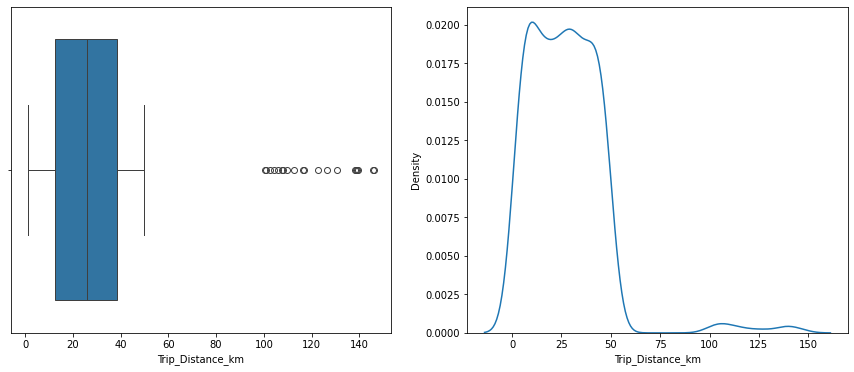

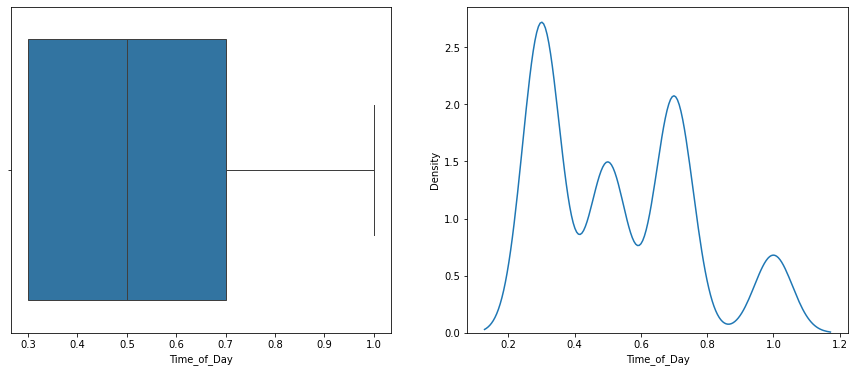

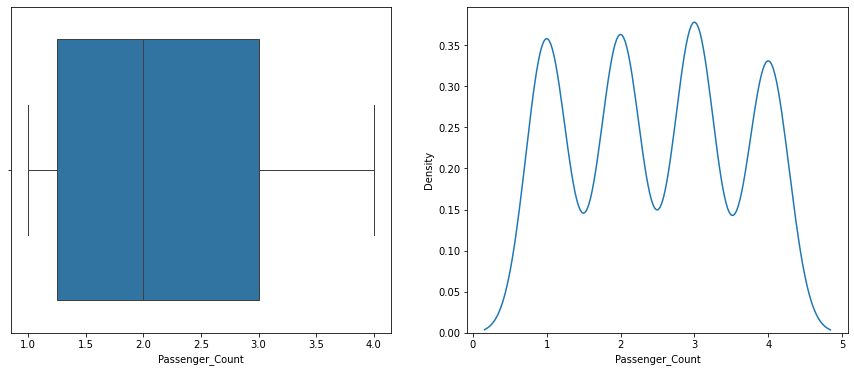

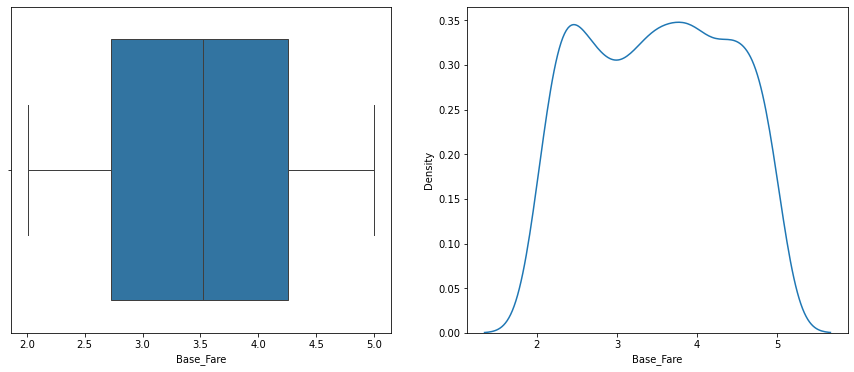

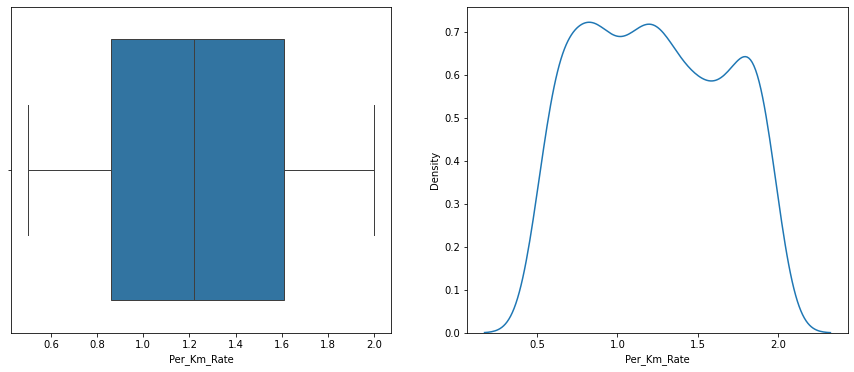

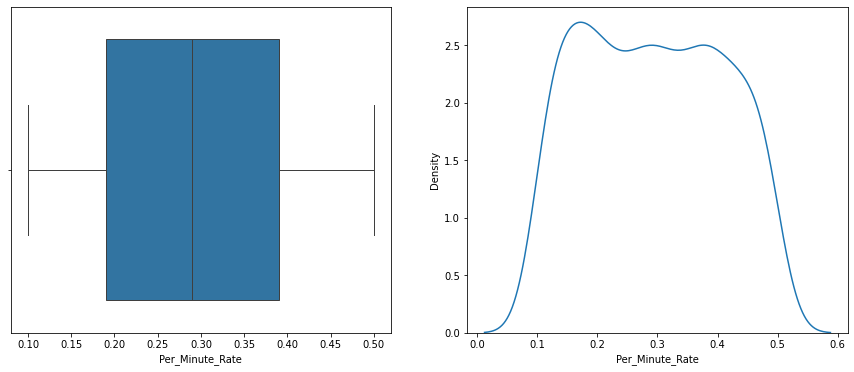

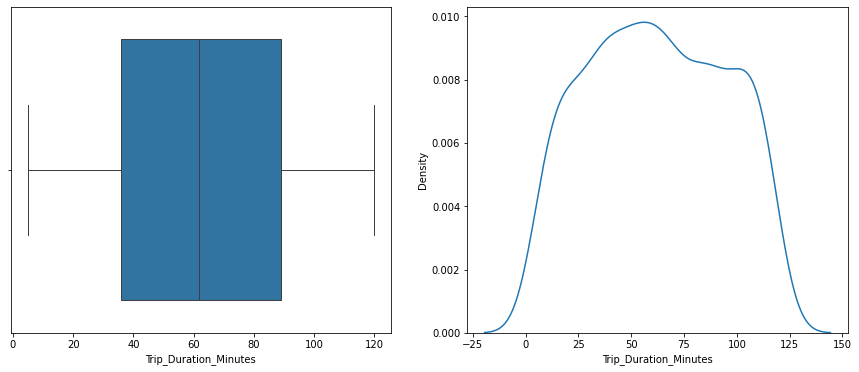

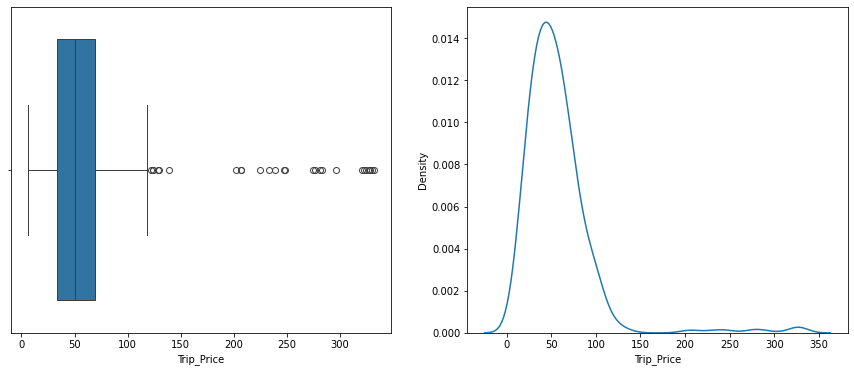

In [146]:
for x in num_data:
    box(data,x)

In [147]:
data.loc[data['Trip_Distance_km'] >= 73] 

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,1.0,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
27,138.098328,0.5,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
64,146.067047,0.3,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
108,112.830958,0.3,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
110,102.747556,0.5,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
141,109.616082,0.3,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
225,130.809001,0.3,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
267,116.196064,0.3,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
268,139.062230,0.3,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
287,100.380420,0.3,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


In [148]:
data.Day_of_Week.unique()

array(['Weekday', 'Weekend', nan], dtype=object)

In [149]:
data['Day_of_Week'] = np.where(data['Day_of_Week'] == 'Weekday',1,0)

In [150]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,0.7,1,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,0.3,1,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,0.5,0,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,0.5,1,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,0.5,1,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [151]:
data.Traffic_Conditions.unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [152]:
data['Traffic_Conditions'] = np.where(data['Traffic_Conditions'] == 'High',1,0)

In [153]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,0.7,1,3.0,0,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,0.3,1,1.0,1,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,0.5,0,1.0,1,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,0.5,1,4.0,0,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,0.5,1,3.0,1,Clear,2.93,0.63,0.32,22.64,15.6180


In [154]:
data.Weather.unique()

array(['Clear', nan, 'Rain', 'Snow'], dtype=object)

In [155]:
data['Weather'] = np.where(data['Weather'] == 'Clear',0,1)

In [156]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,0.7,1,3.0,0,0,3.56,0.80,0.32,53.82,36.2624
1,47.59,0.3,1,1.0,1,0,NaN,0.62,0.43,40.57,NaN
2,36.87,0.5,0,1.0,1,0,2.70,1.21,0.15,37.27,52.9032
3,30.33,0.5,1,4.0,0,1,3.48,0.51,0.15,116.81,36.4698
4,NaN,0.5,1,3.0,1,0,2.93,0.63,0.32,22.64,15.6180


In [157]:
def missingimpute(data,variable):
    data.fillna(data.median())

<Axes: >

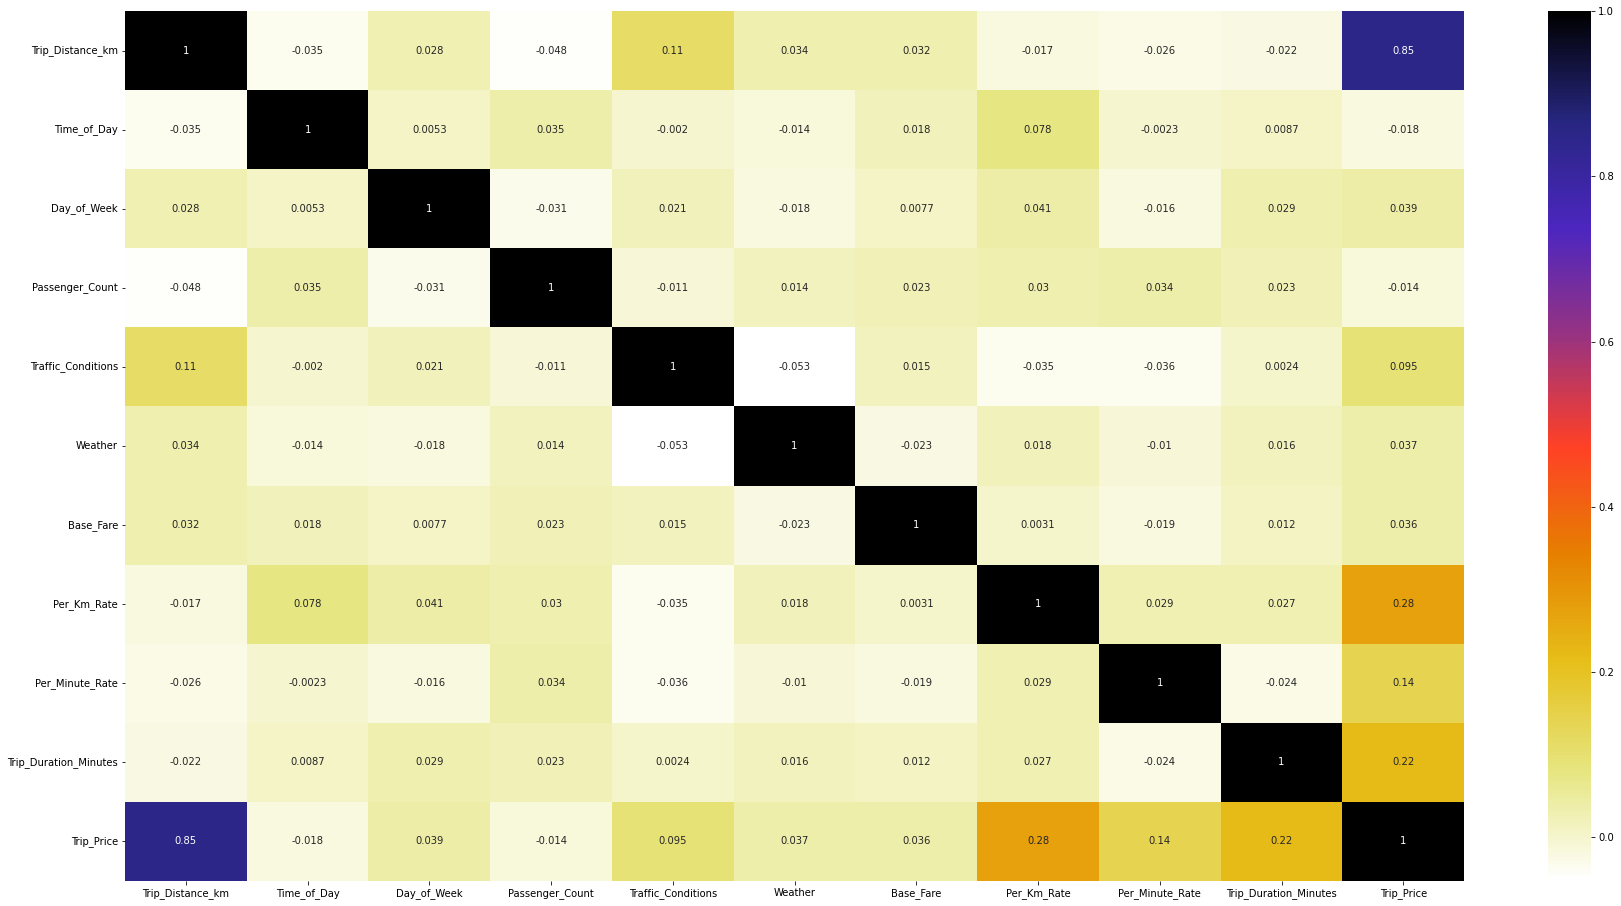

In [158]:
plt.figure(figsize=(30,16))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [159]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

### Outliers 

#### For Trip Distance

In [160]:
upper_bound = data['Trip_Distance_km'].mean() + 3*data['Trip_Distance_km'].std()
lower_bound = data['Trip_Distance_km'].mean() - 3*data['Trip_Distance_km'].std()

In [161]:
IQR = data.Trip_Distance_km.quantile(0.75) - data.Trip_Distance_km.quantile(0.25)
IQR

25.7725

In [162]:
lower_bridge = data['Trip_Distance_km'].quantile(0.25) -  (IQR*3)
upper_bridge = data['Trip_Distance_km'].quantile(0.75) +  (IQR*3)

In [163]:
#data.loc[data['Trip_Distance_km']>=upper_bridge,'Trip_Distance_km'] = upper_bridge
data.loc[data['Trip_Distance_km']>=upper_bound,'Trip_Distance_km'] = upper_bound

<Axes: xlabel='Trip_Distance_km'>

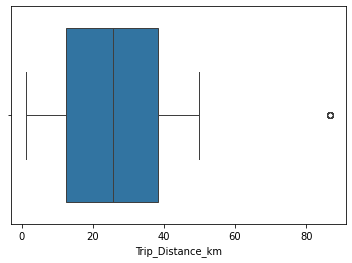

In [164]:
sns.boxplot(data['Trip_Distance_km'],orient='h')




<Axes: xlabel='Trip_Distance_km', ylabel='Density'>

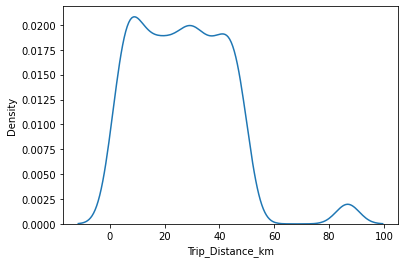

In [165]:
sns.kdeplot(data['Trip_Distance_km'])

Text(0, 0.5, 'no of entries')

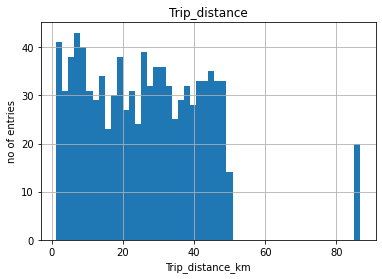

In [166]:
figure = data.Trip_Distance_km.hist(bins=50)
figure.set_title('Trip_distance')
figure.set_xlabel('Trip_distance_km')
figure.set_ylabel('no of entries')


### For Trip Price

In [167]:
upper_bound = data['Trip_Price'].mean() + 3*data['Trip_Price'].std()
lower_bound = data['Trip_Price'].mean() - 3*data['Trip_Price'].std()

In [168]:
IQR = data.Trip_Price.quantile(0.75) - data.Trip_Price.quantile(0.25)
IQR

35.356700000000004

In [169]:
lower_bridge = data['Trip_Price'].quantile(0.25) -  (IQR*3)
upper_bridge = data['Trip_Price'].quantile(0.75) +  (IQR*3)

In [170]:
data.loc[data['Trip_Price']>=upper_bridge,'Trip_Price'] = upper_bridge

<Axes: xlabel='Trip_Price'>

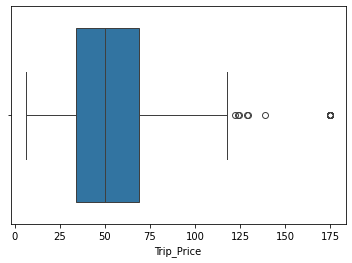

In [171]:
sns.boxplot(data['Trip_Price'],orient='h')

<Axes: xlabel='Trip_Price', ylabel='Density'>

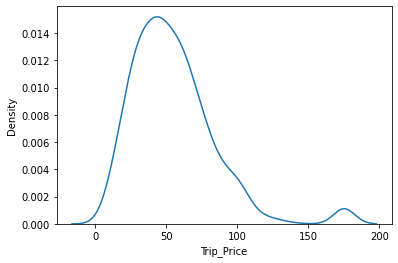

In [172]:
sns.kdeplot(data['Trip_Price'])

Text(0, 0.5, 'no of entries')

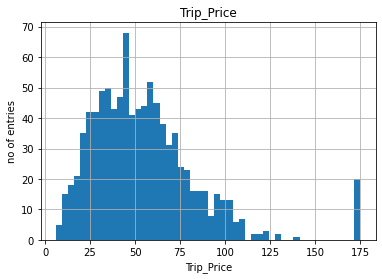

In [173]:
figure = data.Trip_Price.hist(bins=50)
figure.set_title('Trip_Price')
figure.set_xlabel('Trip_Price')
figure.set_ylabel('no of entries')

### NAN Value Imputation with outliers

In [174]:
def impute_nan(df,variable,median):
    extreme = df[variable].mean() + 3*df[variable].std()
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [175]:
impute_nan(data,'Trip_Price',data.Trip_Price.median())

In [176]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Price_end_distribution
0,19.35,0.7,1,3.0,0,0,3.56,0.80,0.32,53.82,36.2624,36.262400
1,47.59,0.3,1,1.0,1,0,NaN,0.62,0.43,40.57,50.0745,143.757722
2,36.87,0.5,0,1.0,1,0,2.70,1.21,0.15,37.27,52.9032,52.903200
3,30.33,0.5,1,4.0,0,1,3.48,0.51,0.15,116.81,36.4698,36.469800
4,NaN,0.5,1,3.0,1,0,2.93,0.63,0.32,22.64,15.6180,15.618000


Text(0, 0.5, 'no of entries')

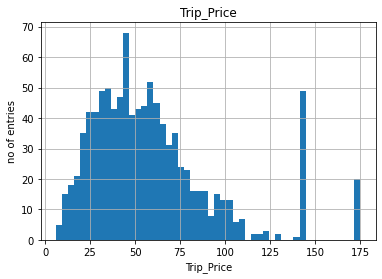

In [177]:

figure = data.Trip_Price_end_distribution.hist(bins=50)
figure.set_title('Trip_Price')
figure.set_xlabel('Trip_Price')
figure.set_ylabel('no of entries')

In [178]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = MinMaxScaler()
robos = RobustScaler()
data['minmax_trip_price'] = scaler.fit_transform(data[['Trip_Price_end_distribution']])

<Axes: xlabel='Trip_Price_end_distribution'>

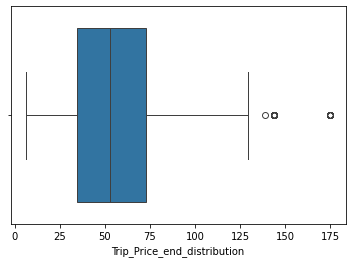

In [179]:
sns.boxplot(data['Trip_Price_end_distribution'],orient='h')

<Axes: xlabel='Trip_Price_end_distribution', ylabel='Density'>

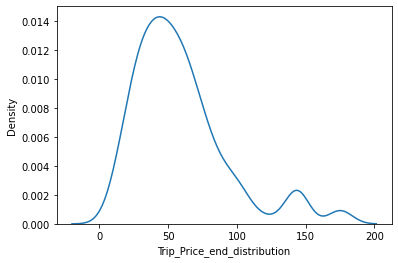

In [180]:
sns.kdeplot(data['Trip_Price_end_distribution'])

In [193]:
t = data.columns

In [204]:
def fillmedian(data):
    for col in data.columns:
        if data[col].isnull().sum() > 0:  
            data[col].fillna( data[col].median(),inplace=True)  



In [205]:
fillmedian(data)

In [206]:
data.isnull().sum()

Trip_Distance_km               0
Time_of_Day                    0
Day_of_Week                    0
Passenger_Count                0
Traffic_Conditions             0
Weather                        0
Base_Fare                      0
Per_Km_Rate                    0
Per_Minute_Rate                0
Trip_Duration_Minutes          0
Trip_Price                     0
Trip_Price_end_distribution    0
minmax_trip_price              0
dtype: int64

In [202]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Price_end_distribution,minmax_trip_price
0,19.35,0.7,1,3.0,0,0,3.56,0.80,0.32,53.82,36.2624,36.262400,0.178272
1,47.59,0.3,1,1.0,1,0,3.52,0.62,0.43,40.57,50.0745,143.757722,0.814179
2,36.87,0.5,0,1.0,1,0,2.70,1.21,0.15,37.27,52.9032,52.903200,0.276713
3,30.33,0.5,1,4.0,0,1,3.48,0.51,0.15,116.81,36.4698,36.469800,0.179499
4,25.83,0.5,1,3.0,1,0,2.93,0.63,0.32,22.64,15.6180,15.618000,0.056146


<Axes: >

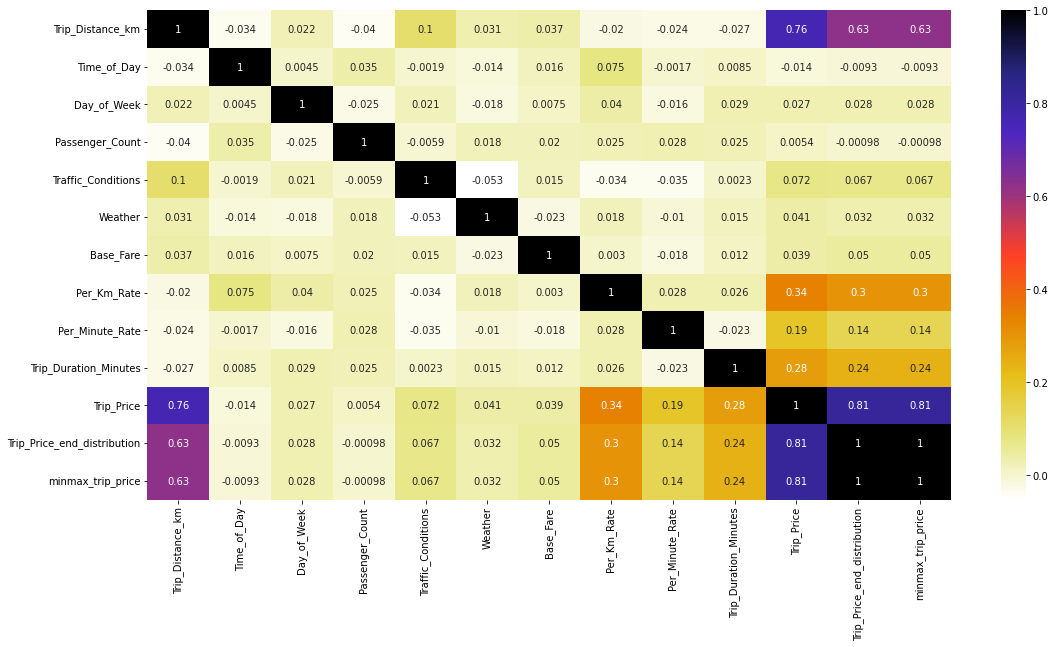

In [203]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap_r)


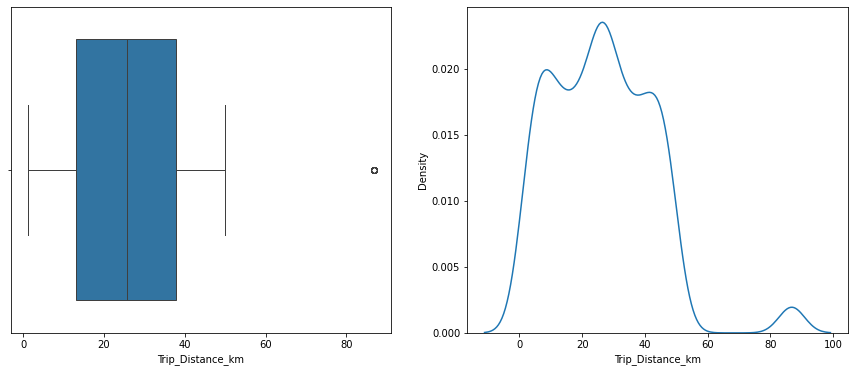

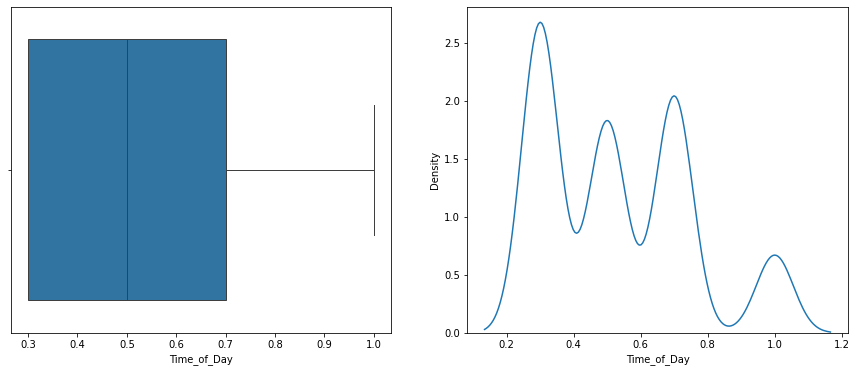

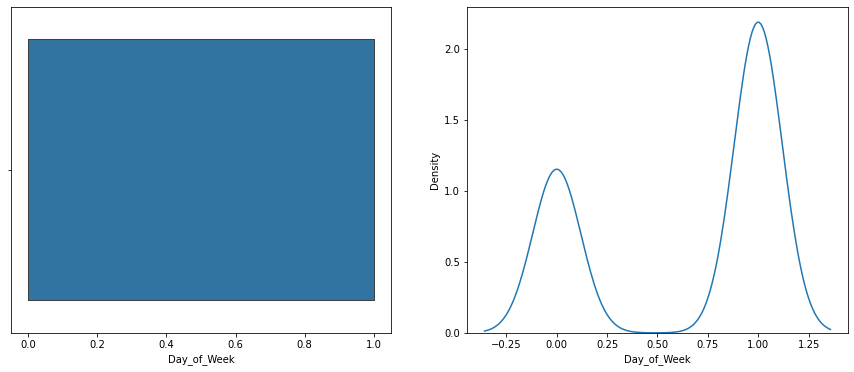

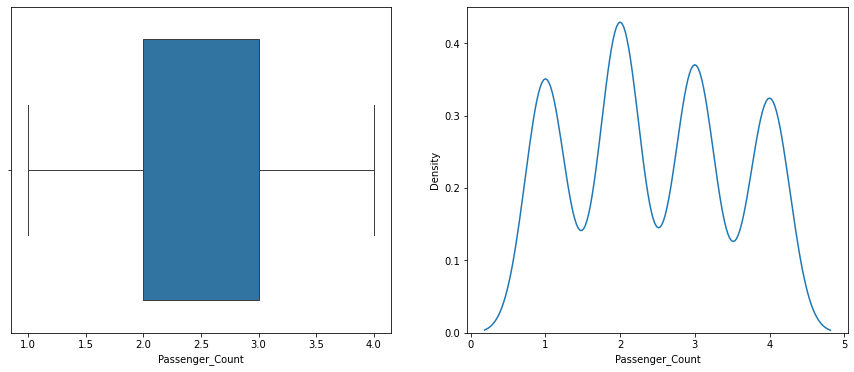

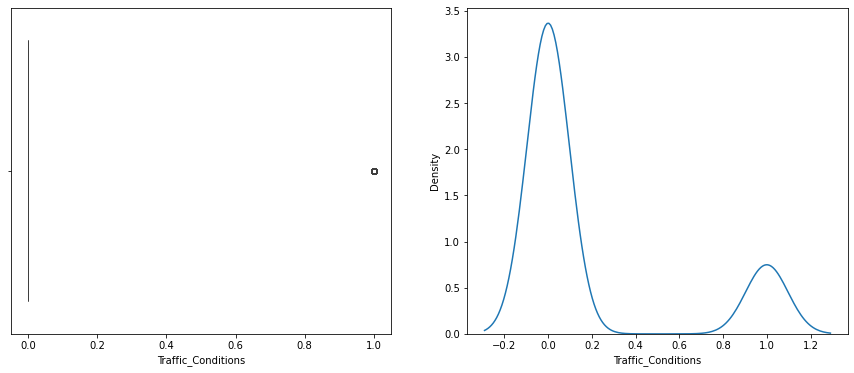

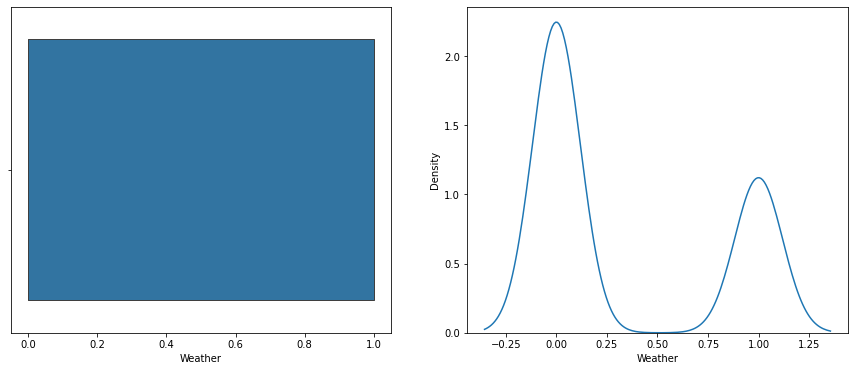

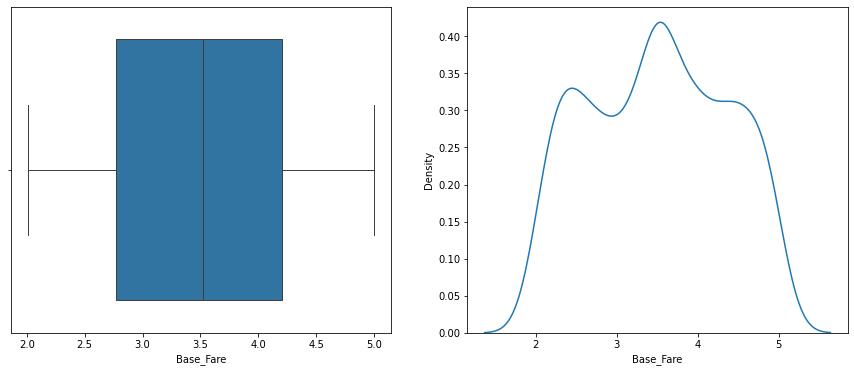

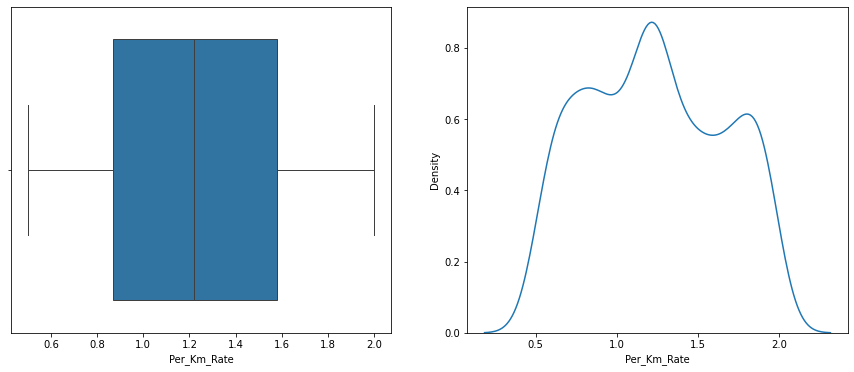

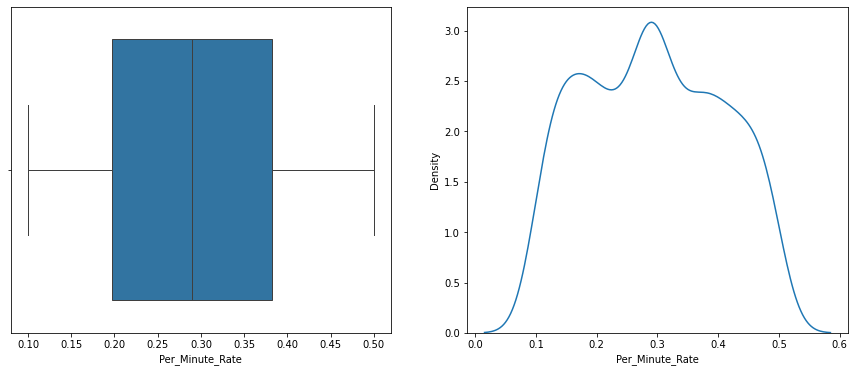

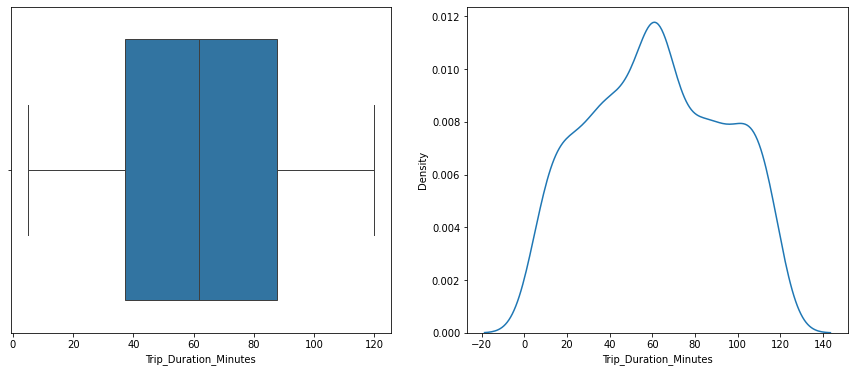

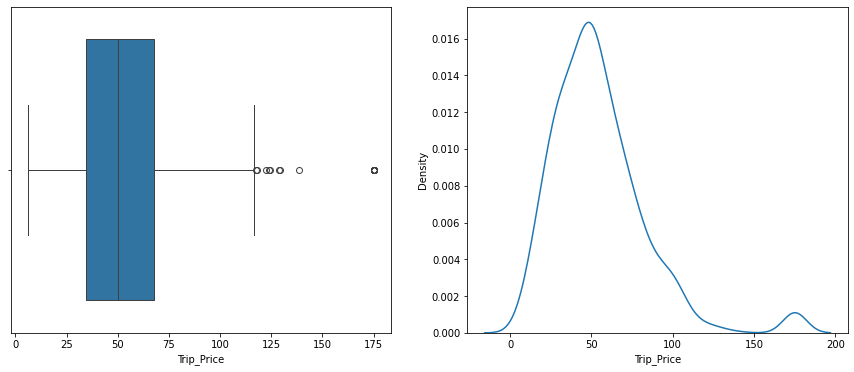

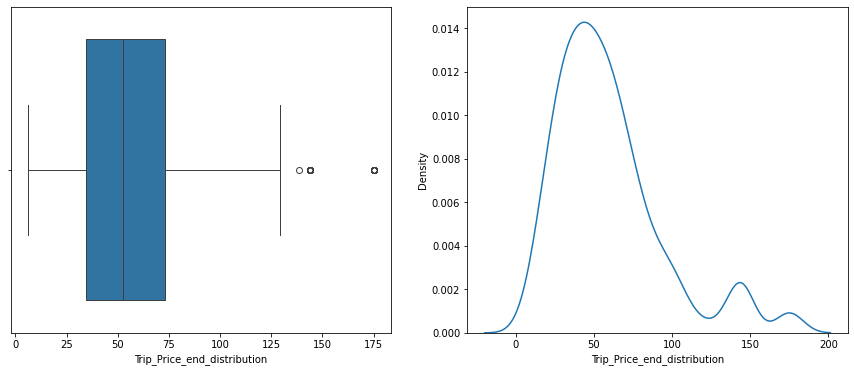

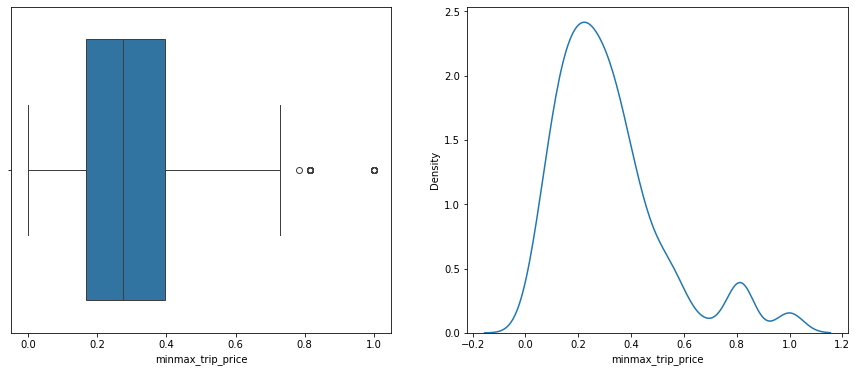

In [207]:
for x in data:
    box(data,x)

<Axes: >

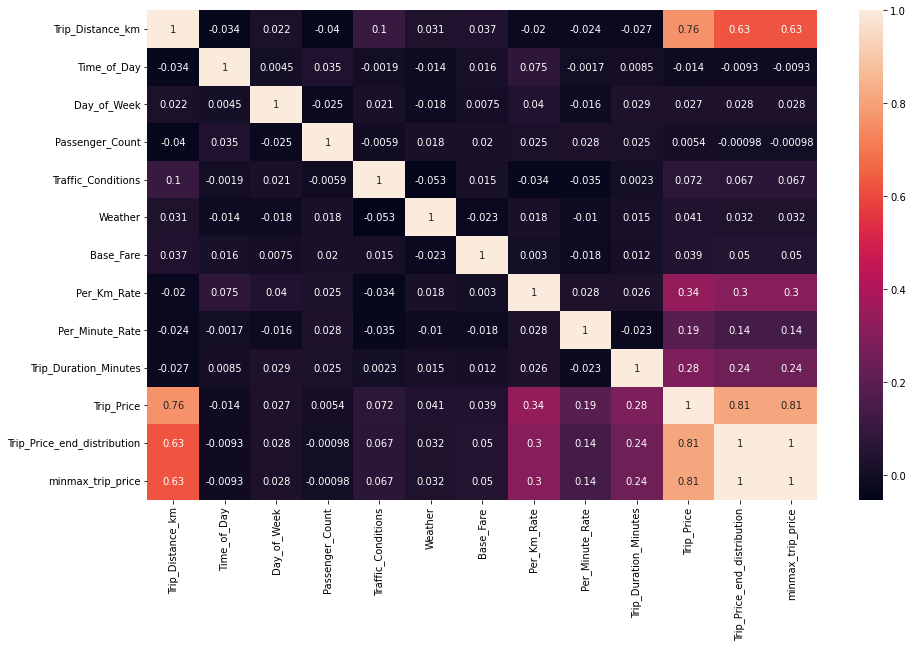

In [209]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True)